In [49]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import numpy as np
plt.style.use('ggplot')

url1 = 'https://raw.githubusercontent.com/jessonpagaduan/covid19policydatabase/master/ADBCovid19-export-2020-07-04.csv'

df1 = pd.read_csv(url1)
df1

,Region,Country,Measure Code,Measure,Currency Code,Amount (Local),Amount USD,Source,Post Date,Details
0,Central and West Asia,Afghanistan,01,01 - Liquidity Support,AFN,NaN,NaN,NaN,2020-06-29,NaN
1,Central and West Asia,Afghanistan,01A,01A - Short-term lending,AFN,NaN,NaN,NaN,2020-06-29,NaN
2,Central and West Asia,Afghanistan,01B,01B - Support policies for short-term lending,AFN,NaN,NaN,IMF. https://www.imf.org/en/Topics/imf-and-cov...,2020-06-29,No estimate/amount: The Financial Stability Co...
3,Central and West Asia,Afghanistan,01C,01C - Forex operations,AFN,NaN,NaN,IMF. https://www.imf.org/en/Topics/imf-and-cov...,2020-06-29,No amount/estimate: (i) DAB is in discussions ...
4,Central and West Asia,Afghanistan,02,02 - Credit creation,AFN,NaN,NaN,NaN,2020-06-29,NaN
...,...,...,...,...,...,...,...,...,...,...
2365,Southeast Asia,Viet Nam,09A,09A - Swaps,VND,NaN,NaN,NaN,2020-06-29,NaN
2366,Southeast Asia,Viet Nam,09B,09B - International loans/grants,VND,NaN,NaN,NaN,2020-06-29,NaN
2367,Southeast Asia,Viet Nam,10,10 - No breakdown,VND,NaN,NaN,NaN,2020-06-29,NaN
2368,Southeast Asia,Viet Nam,11,11 - Other Economic Measures,VND,NaN,NaN,"IMF,MOF, SBV. https://www.imf.org/en/Topics/im...",2020-06-29,"(i) On March 31, the State Bank of Vietnam ins..."


In [50]:
df1.drop(columns=['Source', 'Post Date', 'Details'], inplace=True)

In [51]:
df1.columns = ['region', 'country', 'measure_id', 'measure_name', 'currency', 'amount_lcy', 'amount_usd']
df1.set_index(['region', 'country'], inplace=True)
z1 = df1.measure_id.unique()
z2 = [1, 1.1, 1.2, 1.3, 2, 2.1, 2.2, 2.3, 3, 3.1, 3.2, 4, 5, 5.1, 5.2,
                            6, 7, 7.1, 7.2, 8, 8.1, 8.2, 8.21, 8.22, 9, 9.1, 9.2, 10, 11, 12]
z2 = [float(i) for i in z2]
z = zip(z1, z2)
df1.measure_id.replace(dict(z), inplace=True)

In [208]:
total_pkg_lcy = df1[df1.measure_id.isin([1, 2, 3, 4, 5, 9, 10])].groupby(level=1).sum().loc[:, 'amount_lcy']
total_pkg_usd = df1[df1.measure_id.isin([1, 2, 3, 4, 5, 9, 10])].groupby(level=1).sum().loc[:, 'amount_usd']
frames = [total_pkg_lcy, total_pkg_usd]
df2 = pd.concat(frames, axis=1)

In [209]:
df2

,amount_lcy,amount_usd
country,,
Afghanistan,8.000000e+09,1.016625e+08
Arab Republic of Egypt,3.334800e+11,2.122053e+10
Argentina,6.787610e+11,1.081691e+10
Armenia,3.000000e+11,6.134861e+08
Australia,4.189555e+11,2.605065e+11
...,...,...
United Kingdom,6.118098e+11,7.574831e+11
United States,6.851653e+12,6.851653e+12
Uzbekistan,3.070000e+11,3.213240e+07


In [210]:
df2.columns = ['total_pkg_lcy', 'total_pkg_usd']

In [211]:
df2

,total_pkg_lcy,total_pkg_usd
country,,
Afghanistan,8.000000e+09,1.016625e+08
Arab Republic of Egypt,3.334800e+11,2.122053e+10
Argentina,6.787610e+11,1.081691e+10
Armenia,3.000000e+11,6.134861e+08
Australia,4.189555e+11,2.605065e+11
...,...,...
United Kingdom,6.118098e+11,7.574831e+11
United States,6.851653e+12,6.851653e+12
Uzbekistan,3.070000e+11,3.213240e+07


In [52]:
loan_guarantees = df1.reset_index(level=0)[df1.reset_index(level=0).measure_id == 2.3]

In [53]:
loan_guarantees.dropna().sort_values(by='amount_usd', ascending=False)

,region,measure_id,measure_name,currency,amount_lcy,amount_usd
country,,,,,,
United States,Other ADB Members,2.3,02C - Loan guarantees,USD,1.085500e+12,1.085500e+12
Germany,Other ADB Members,2.3,02C - Loan guarantees,EUR,4.630000e+11,5.121681e+11
Italy,Other ADB Members,2.3,02C - Loan guarantees,EUR,4.314800e+11,4.773009e+11
France,Other ADB Members,2.3,02C - Loan guarantees,EUR,3.200000e+11,3.539823e+11
Spain,Other ADB Members,2.3,02C - Loan guarantees,EUR,1.042200e+11,1.152876e+11
Belgium,Other ADB Members,2.3,02C - Loan guarantees,EUR,5.200000e+10,5.752212e+10
European Union,Others,2.3,02C - Loan guarantees,EUR,4.600000e+10,5.088496e+10
Switzerland,Other ADB Members,2.3,02C - Loan guarantees,CHF/CHE/CHW,4.258000e+10,4.447208e+10
India,South Asia,2.3,02C - Loan guarantees,INR,3.000000e+12,4.036805e+10


In [54]:
len(loan_guarantees.dropna().sort_values(by='amount_usd', ascending=False))

38

In [55]:
lg_world = loan_guarantees.dropna().sort_values(by='amount_usd', ascending=False)

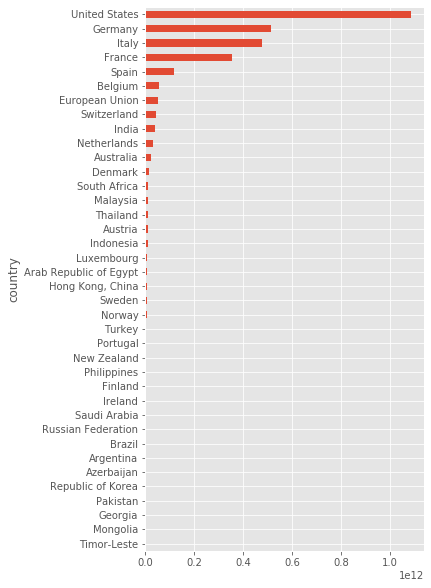

In [56]:
fig, ax = plt.subplots(figsize=(5, 10))
ax = lg_world['amount_usd'].plot(kind='barh')
ax.invert_yaxis()

In [57]:
lg_world[~lg_world.region.isin(['Others', 'Other ADB Members', 'Other Economies'])]

,region,measure_id,measure_name,currency,amount_lcy,amount_usd
country,,,,,,
India,South Asia,2.3,02C - Loan guarantees,INR,3.000000e+12,4.036805e+10
Malaysia,Southeast Asia,2.3,02C - Loan guarantees,MYR,5.000000e+10,1.163928e+10
Thailand,Southeast Asia,2.3,02C - Loan guarantees,THB,3.500000e+11,1.090079e+10
Indonesia,Southeast Asia,2.3,02C - Loan guarantees,IDR,1.500000e+14,9.871945e+09
"Hong Kong, China",East Asia,2.3,02C - Loan guarantees,HKD,5.040000e+10,6.490580e+09
Philippines,Southeast Asia,2.3,02C - Loan guarantees,PHP,1.200000e+11,2.357397e+09
Azerbaijan,Central and West Asia,2.3,02C - Loan guarantees,AZN,5.000000e+08,2.941176e+08
Republic of Korea,East Asia,2.3,02C - Loan guarantees,KRW,3.000000e+11,2.458842e+08
Pakistan,Central and West Asia,2.3,02C - Loan guarantees,PKR,3.000000e+10,1.807962e+08


In [58]:
lg_asia = lg_world[~lg_world.region.isin(['Others', 'Other ADB Members', 'Other Economies'])]

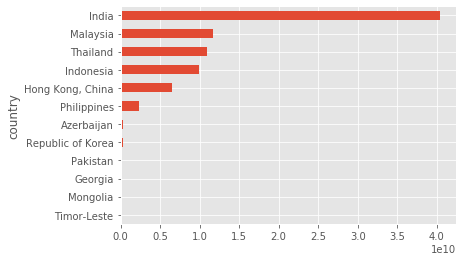

In [59]:
fig, ax = plt.subplots()
ax = lg_asia.amount_usd.plot(kind='barh')
ax.invert_yaxis()

[Text(0, 0.5, ''),
 Text(0.5, 0, 'USD billion'),
 Text(0.5, 1.0, 'Loan guarantees for liquidity support')]

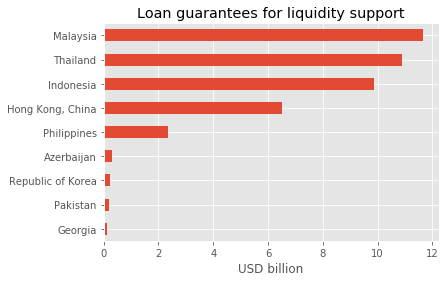

In [60]:
fig, ax = plt.subplots()
ax = lg_asia.loc['Malaysia':'Georgia', 'amount_usd'].plot(kind='barh')
ax.invert_yaxis()
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x/1e9))))
ax.set(title='Loan guarantees for liquidity support', ylabel='', xlabel='USD billion')

In [61]:
nfc_debt = pd.Series({'Hong Kong, China':228.2, 'India':44, 'Indonesia':22.6,
                      'Republic of Korea':102.6, 'Malaysia':67.9, 'Pakistan':13.6,
                      'Philippines':30.9, 'People\'s Republic of China':150.3,
                      'Singapore':124, 'Thailand':47.3}, name='debt_gdp')

In [62]:
nfc_debt

Hong Kong, China              228.2
India                          44.0
Indonesia                      22.6
Republic of Korea             102.6
Malaysia                       67.9
Pakistan                       13.6
Philippines                    30.9
People's Republic of China    150.3
Singapore                     124.0
Thailand                       47.3
Name: debt_gdp, dtype: float64

In [63]:
lg_asia

,region,measure_id,measure_name,currency,amount_lcy,amount_usd
country,,,,,,
India,South Asia,2.3,02C - Loan guarantees,INR,3.000000e+12,4.036805e+10
Malaysia,Southeast Asia,2.3,02C - Loan guarantees,MYR,5.000000e+10,1.163928e+10
Thailand,Southeast Asia,2.3,02C - Loan guarantees,THB,3.500000e+11,1.090079e+10
Indonesia,Southeast Asia,2.3,02C - Loan guarantees,IDR,1.500000e+14,9.871945e+09
"Hong Kong, China",East Asia,2.3,02C - Loan guarantees,HKD,5.040000e+10,6.490580e+09
Philippines,Southeast Asia,2.3,02C - Loan guarantees,PHP,1.200000e+11,2.357397e+09
Azerbaijan,Central and West Asia,2.3,02C - Loan guarantees,AZN,5.000000e+08,2.941176e+08
Republic of Korea,East Asia,2.3,02C - Loan guarantees,KRW,3.000000e+11,2.458842e+08
Pakistan,Central and West Asia,2.3,02C - Loan guarantees,PKR,3.000000e+10,1.807962e+08


In [64]:
lg_asia.join(nfc_debt)

,region,measure_id,measure_name,currency,amount_lcy,amount_usd,debt_gdp
country,,,,,,,
India,South Asia,2.3,02C - Loan guarantees,INR,3.000000e+12,4.036805e+10,44.0
Malaysia,Southeast Asia,2.3,02C - Loan guarantees,MYR,5.000000e+10,1.163928e+10,67.9
Thailand,Southeast Asia,2.3,02C - Loan guarantees,THB,3.500000e+11,1.090079e+10,47.3
Indonesia,Southeast Asia,2.3,02C - Loan guarantees,IDR,1.500000e+14,9.871945e+09,22.6
"Hong Kong, China",East Asia,2.3,02C - Loan guarantees,HKD,5.040000e+10,6.490580e+09,228.2
Philippines,Southeast Asia,2.3,02C - Loan guarantees,PHP,1.200000e+11,2.357397e+09,30.9
Azerbaijan,Central and West Asia,2.3,02C - Loan guarantees,AZN,5.000000e+08,2.941176e+08,NaN
Republic of Korea,East Asia,2.3,02C - Loan guarantees,KRW,3.000000e+11,2.458842e+08,102.6
Pakistan,Central and West Asia,2.3,02C - Loan guarantees,PKR,3.000000e+10,1.807962e+08,13.6


In [65]:
lg_world

,region,measure_id,measure_name,currency,amount_lcy,amount_usd
country,,,,,,
United States,Other ADB Members,2.3,02C - Loan guarantees,USD,1.085500e+12,1.085500e+12
Germany,Other ADB Members,2.3,02C - Loan guarantees,EUR,4.630000e+11,5.121681e+11
Italy,Other ADB Members,2.3,02C - Loan guarantees,EUR,4.314800e+11,4.773009e+11
France,Other ADB Members,2.3,02C - Loan guarantees,EUR,3.200000e+11,3.539823e+11
Spain,Other ADB Members,2.3,02C - Loan guarantees,EUR,1.042200e+11,1.152876e+11
Belgium,Other ADB Members,2.3,02C - Loan guarantees,EUR,5.200000e+10,5.752212e+10
European Union,Others,2.3,02C - Loan guarantees,EUR,4.600000e+10,5.088496e+10
Switzerland,Other ADB Members,2.3,02C - Loan guarantees,CHF/CHE/CHW,4.258000e+10,4.447208e+10
India,South Asia,2.3,02C - Loan guarantees,INR,3.000000e+12,4.036805e+10


In [66]:
lg_world.join(nfc_debt).dropna()

,region,measure_id,measure_name,currency,amount_lcy,amount_usd,debt_gdp
country,,,,,,,
India,South Asia,2.3,02C - Loan guarantees,INR,3.000000e+12,4.036805e+10,44.0
Malaysia,Southeast Asia,2.3,02C - Loan guarantees,MYR,5.000000e+10,1.163928e+10,67.9
Thailand,Southeast Asia,2.3,02C - Loan guarantees,THB,3.500000e+11,1.090079e+10,47.3
Indonesia,Southeast Asia,2.3,02C - Loan guarantees,IDR,1.500000e+14,9.871945e+09,22.6
"Hong Kong, China",East Asia,2.3,02C - Loan guarantees,HKD,5.040000e+10,6.490580e+09,228.2
Philippines,Southeast Asia,2.3,02C - Loan guarantees,PHP,1.200000e+11,2.357397e+09,30.9
Republic of Korea,East Asia,2.3,02C - Loan guarantees,KRW,3.000000e+11,2.458842e+08,102.6
Pakistan,Central and West Asia,2.3,02C - Loan guarantees,PKR,3.000000e+10,1.807962e+08,13.6


In [67]:
scatter_data = lg_world.join(nfc_debt).dropna()

In [68]:
data = lg_world.join(nfc_debt).dropna()

In [69]:
scatter_data

,region,measure_id,measure_name,currency,amount_lcy,amount_usd,debt_gdp
country,,,,,,,
India,South Asia,2.3,02C - Loan guarantees,INR,3.000000e+12,4.036805e+10,44.0
Malaysia,Southeast Asia,2.3,02C - Loan guarantees,MYR,5.000000e+10,1.163928e+10,67.9
Thailand,Southeast Asia,2.3,02C - Loan guarantees,THB,3.500000e+11,1.090079e+10,47.3
Indonesia,Southeast Asia,2.3,02C - Loan guarantees,IDR,1.500000e+14,9.871945e+09,22.6
"Hong Kong, China",East Asia,2.3,02C - Loan guarantees,HKD,5.040000e+10,6.490580e+09,228.2
Philippines,Southeast Asia,2.3,02C - Loan guarantees,PHP,1.200000e+11,2.357397e+09,30.9
Republic of Korea,East Asia,2.3,02C - Loan guarantees,KRW,3.000000e+11,2.458842e+08,102.6
Pakistan,Central and West Asia,2.3,02C - Loan guarantees,PKR,3.000000e+10,1.807962e+08,13.6


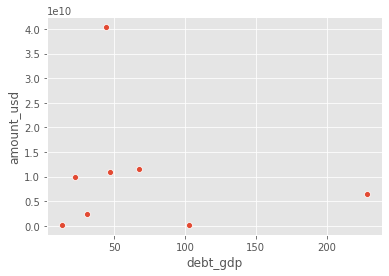

In [70]:
sns.scatterplot(x=scatter_data.debt_gdp, 
                y=scatter_data.amount_usd)

In [71]:
data

,region,measure_id,measure_name,currency,amount_lcy,amount_usd,debt_gdp
country,,,,,,,
India,South Asia,2.3,02C - Loan guarantees,INR,3.000000e+12,4.036805e+10,44.0
Malaysia,Southeast Asia,2.3,02C - Loan guarantees,MYR,5.000000e+10,1.163928e+10,67.9
Thailand,Southeast Asia,2.3,02C - Loan guarantees,THB,3.500000e+11,1.090079e+10,47.3
Indonesia,Southeast Asia,2.3,02C - Loan guarantees,IDR,1.500000e+14,9.871945e+09,22.6
"Hong Kong, China",East Asia,2.3,02C - Loan guarantees,HKD,5.040000e+10,6.490580e+09,228.2
Philippines,Southeast Asia,2.3,02C - Loan guarantees,PHP,1.200000e+11,2.357397e+09,30.9
Republic of Korea,East Asia,2.3,02C - Loan guarantees,KRW,3.000000e+11,2.458842e+08,102.6
Pakistan,Central and West Asia,2.3,02C - Loan guarantees,PKR,3.000000e+10,1.807962e+08,13.6


C:\Anaconda\lib\site-packages\ipykernel_launcher.py:30: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.


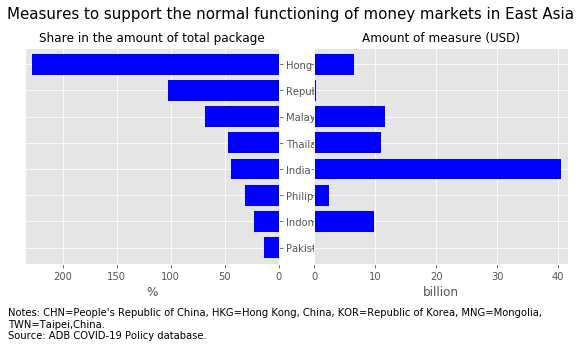

In [72]:
y0 = data.sort_values(by='debt_gdp')['debt_gdp']
y1 = data.sort_values(by='debt_gdp')['amount_usd']

fig, axs = plt.subplots(ncols=2, figsize=(8, 4), sharey=True)

axs[0].barh(y0.index, y0, align='center', color='blue')
axs[0].invert_yaxis()
axs[0].set_title('Share in the amount of total package', fontsize=12)
axs[0].set_xlabel('%')

axs[1].barh(y1.index, y1, align='center', color='blue')
axs[1].invert_yaxis()
axs[1].set_title('Amount of measure (USD)', fontsize=12)
axs[1].get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x/1e9))))
axs[1].set_xlabel('billion')

axs[0].invert_xaxis()
axs[0].set(yticks=y0.index, yticklabels=y0.index)
axs[0].yaxis.tick_right()

for ax in axs.flat:
    ax.margins(0.03)
    ax.grid(True)

fig.suptitle('Measures to support the normal functioning of money markets in East Asia',
             y=1.05, fontsize=15)
fig.tight_layout()
fig.subplots_adjust(wspace=0.14)
plt.annotate('Notes: CHN=People\'s Republic of China, HKG=Hong Kong, China, KOR=Republic of Korea, \
MNG=Mongolia, \nTWN=Taipei,China. \nSource: ADB COVID-19 Policy database.', xy=(-1.2, -0.20), xycoords='axes fraction', textcoords='offset points', va='top')
plt.show()

In [73]:
url2 = 'https://raw.githubusercontent.com/jessonpagaduan/covid19policydatabase/master/IMF-WEO_2019-GDP-2018-Popn.csv'

In [74]:
df3 = pd.read_csv(url2)

In [75]:
df3.set_index('country', inplace=True)

In [76]:
df3.columns = ['gdp_lcy', 'gdp_usd', 'popn']

In [77]:
data = data.join(df3)

In [78]:
data = data.assign(lg_gdp = lambda x: 100 * x.amount_usd / x.gdp_usd)

In [79]:
data

,region,measure_id,measure_name,currency,amount_lcy,amount_usd,debt_gdp,gdp_lcy,gdp_usd,popn,lg_gdp
country,,,,,,,,,,,
India,South Asia,2.3,02C - Loan guarantees,INR,3.000000e+12,4.036805e+10,44.0,2.089850e+14,2.935570e+12,1.352617e+09,1.375135
Malaysia,Southeast Asia,2.3,02C - Loan guarantees,MYR,5.000000e+10,1.163928e+10,67.9,1.526750e+12,3.653030e+11,3.152858e+07,3.186198
Thailand,Southeast Asia,2.3,02C - Loan guarantees,THB,3.500000e+11,1.090079e+10,47.3,1.692200e+13,5.291770e+11,6.942852e+07,2.059951
Indonesia,Southeast Asia,2.3,02C - Loan guarantees,IDR,1.500000e+14,9.871945e+09,22.6,1.607580e+16,1.111710e+12,2.676634e+08,0.887996
"Hong Kong, China",East Asia,2.3,02C - Loan guarantees,HKD,5.040000e+10,6.490580e+09,228.2,2.921250e+12,3.729890e+11,7.451000e+06,1.740153
Philippines,Southeast Asia,2.3,02C - Loan guarantees,PHP,1.200000e+11,2.357397e+09,30.9,1.873280e+13,3.568140e+11,1.066519e+08,0.660680
Republic of Korea,East Asia,2.3,02C - Loan guarantees,KRW,3.000000e+11,2.458842e+08,102.6,1.913640e+15,1.629530e+12,5.163526e+07,0.015089
Pakistan,Central and West Asia,2.3,02C - Loan guarantees,PKR,3.000000e+10,1.807962e+08,13.6,3.855880e+13,2.842140e+11,2.122150e+08,0.063613


C:\Anaconda\lib\site-packages\ipykernel_launcher.py:31: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.


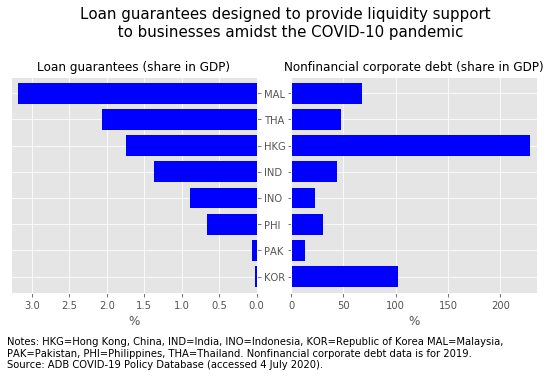

In [80]:
y0 = data.sort_values(by='lg_gdp')['lg_gdp']
y1 = data.sort_values(by='lg_gdp')['debt_gdp']

fig, axs = plt.subplots(ncols=2, figsize=(8, 4), sharey=True)

axs[0].barh(y0.index, y0, align='center', color='blue')
axs[0].invert_yaxis()
axs[0].set_title('Loan guarantees (share in GDP)', fontsize=12)
axs[0].set_xlabel('%')

axs[1].barh(y1.index, y1, align='center', color='blue')
axs[1].invert_yaxis()
axs[1].set_title('Nonfinancial corporate debt (share in GDP)', fontsize=12)
axs[1].set_xlabel('%')

axs[0].invert_xaxis()
axs[0].set(yticks=y0.index, yticklabels=['MAL', 'THA', 'HKG', 'IND', 
                                         'INO', 'PHI', 'PAK', 'KOR'][::-1])
axs[0].yaxis.tick_right()

for ax in axs.flat:
    ax.margins(0.03)
    ax.grid(True)

fig.suptitle('Loan guarantees designed to provide liquidity support \n to businesses amidst the COVID-10 pandemic',
             y=1.15, fontsize=15)
fig.tight_layout()
fig.subplots_adjust(wspace=0.14)
plt.annotate('Notes: HKG=Hong Kong, China, IND=India, INO=Indonesia, KOR=Republic of Korea \
MAL=Malaysia, \nPAK=Pakistan, PHI=Philippines, THA=Thailand. \
Nonfinancial corporate debt data is for 2019. \nSource: ADB COVID-19 Policy Database (accessed 4 July 2020).', xy=(-1.15, -0.20), xycoords='axes fraction', textcoords='offset points', va='top')
plt.show()

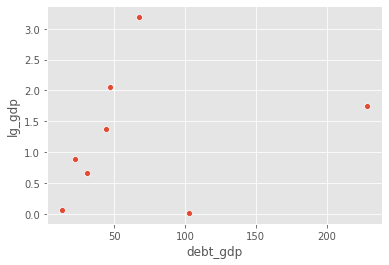

In [81]:
sns.scatterplot(x=y1, y=y0)

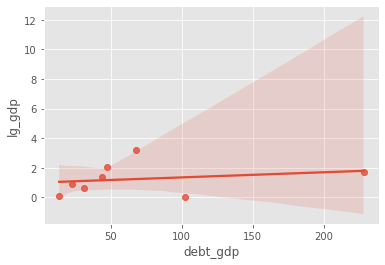

In [82]:
sns.regplot(y1, y0)

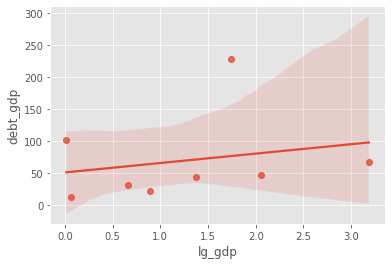

In [83]:
sns.regplot(y0, y1)

In [84]:
data

,region,measure_id,measure_name,currency,amount_lcy,amount_usd,debt_gdp,gdp_lcy,gdp_usd,popn,lg_gdp
country,,,,,,,,,,,
India,South Asia,2.3,02C - Loan guarantees,INR,3.000000e+12,4.036805e+10,44.0,2.089850e+14,2.935570e+12,1.352617e+09,1.375135
Malaysia,Southeast Asia,2.3,02C - Loan guarantees,MYR,5.000000e+10,1.163928e+10,67.9,1.526750e+12,3.653030e+11,3.152858e+07,3.186198
Thailand,Southeast Asia,2.3,02C - Loan guarantees,THB,3.500000e+11,1.090079e+10,47.3,1.692200e+13,5.291770e+11,6.942852e+07,2.059951
Indonesia,Southeast Asia,2.3,02C - Loan guarantees,IDR,1.500000e+14,9.871945e+09,22.6,1.607580e+16,1.111710e+12,2.676634e+08,0.887996
"Hong Kong, China",East Asia,2.3,02C - Loan guarantees,HKD,5.040000e+10,6.490580e+09,228.2,2.921250e+12,3.729890e+11,7.451000e+06,1.740153
Philippines,Southeast Asia,2.3,02C - Loan guarantees,PHP,1.200000e+11,2.357397e+09,30.9,1.873280e+13,3.568140e+11,1.066519e+08,0.660680
Republic of Korea,East Asia,2.3,02C - Loan guarantees,KRW,3.000000e+11,2.458842e+08,102.6,1.913640e+15,1.629530e+12,5.163526e+07,0.015089
Pakistan,Central and West Asia,2.3,02C - Loan guarantees,PKR,3.000000e+10,1.807962e+08,13.6,3.855880e+13,2.842140e+11,2.122150e+08,0.063613


In [85]:
data['debt_gdp']

country
India                 44.0
Malaysia              67.9
Thailand              47.3
Indonesia             22.6
Hong Kong, China     228.2
Philippines           30.9
Republic of Korea    102.6
Pakistan              13.6
Name: debt_gdp, dtype: float64

In [86]:
other_debt = pd.Series({'Hong Kong, China':290.8, 'India':85, 'Indonesia':56.4,
                      'Republic of Korea':227.4, 'Malaysia':153.1, 'Pakistan':80.4,
                      'Philippines':68.1, 'People\'s Republic of China':149.7,
                      'Singapore':356, 'Thailand':140.7}, name='other_gdp')

In [91]:
data2 = data.join(other_debt)

In [92]:
data2

,region,measure_id,measure_name,currency,amount_lcy,amount_usd,debt_gdp,gdp_lcy,gdp_usd,popn,lg_gdp,other_gdp
country,,,,,,,,,,,,
India,South Asia,2.3,02C - Loan guarantees,INR,3.000000e+12,4.036805e+10,44.0,2.089850e+14,2.935570e+12,1.352617e+09,1.375135,85.0
Malaysia,Southeast Asia,2.3,02C - Loan guarantees,MYR,5.000000e+10,1.163928e+10,67.9,1.526750e+12,3.653030e+11,3.152858e+07,3.186198,153.1
Thailand,Southeast Asia,2.3,02C - Loan guarantees,THB,3.500000e+11,1.090079e+10,47.3,1.692200e+13,5.291770e+11,6.942852e+07,2.059951,140.7
Indonesia,Southeast Asia,2.3,02C - Loan guarantees,IDR,1.500000e+14,9.871945e+09,22.6,1.607580e+16,1.111710e+12,2.676634e+08,0.887996,56.4
"Hong Kong, China",East Asia,2.3,02C - Loan guarantees,HKD,5.040000e+10,6.490580e+09,228.2,2.921250e+12,3.729890e+11,7.451000e+06,1.740153,290.8
Philippines,Southeast Asia,2.3,02C - Loan guarantees,PHP,1.200000e+11,2.357397e+09,30.9,1.873280e+13,3.568140e+11,1.066519e+08,0.660680,68.1
Republic of Korea,East Asia,2.3,02C - Loan guarantees,KRW,3.000000e+11,2.458842e+08,102.6,1.913640e+15,1.629530e+12,5.163526e+07,0.015089,227.4
Pakistan,Central and West Asia,2.3,02C - Loan guarantees,PKR,3.000000e+10,1.807962e+08,13.6,3.855880e+13,2.842140e+11,2.122150e+08,0.063613,80.4


In [93]:
doughnut_data = data2[['debt_gdp', 'other_gdp', 'amount_usd', 'lg_gdp']]

In [94]:
doughnut_data

,debt_gdp,other_gdp,amount_usd,lg_gdp
country,,,,
India,44.0,85.0,4.036805e+10,1.375135
Malaysia,67.9,153.1,1.163928e+10,3.186198
Thailand,47.3,140.7,1.090079e+10,2.059951
Indonesia,22.6,56.4,9.871945e+09,0.887996
"Hong Kong, China",228.2,290.8,6.490580e+09,1.740153
Philippines,30.9,68.1,2.357397e+09,0.660680
Republic of Korea,102.6,227.4,2.458842e+08,0.015089
Pakistan,13.6,80.4,1.807962e+08,0.063613


In [97]:
doughnut_data.iloc[5, [0, 1]]

debt_gdp     30.9
other_gdp    68.1
Name: Philippines, dtype: float64

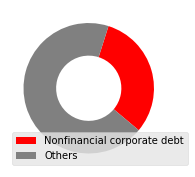

In [110]:
fig, ax = plt.subplots(figsize=(6,3), subplot_kw=dict(aspect='equal'))

debt = ['Nonfinancial corporate debt', 'Others']

data = doughnut_data.loc['Philippines', ['debt_gdp', 'other_gdp']]

wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-40,
                      colors=['red', 'gray'])

# bbox_props = dict(boxstyle='square,pad=0.3', fc='w', ec='k', lw=0.72)


plt.legend(['Nonfinancial corporate debt', 'Others'])
plt.show()

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:68: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.


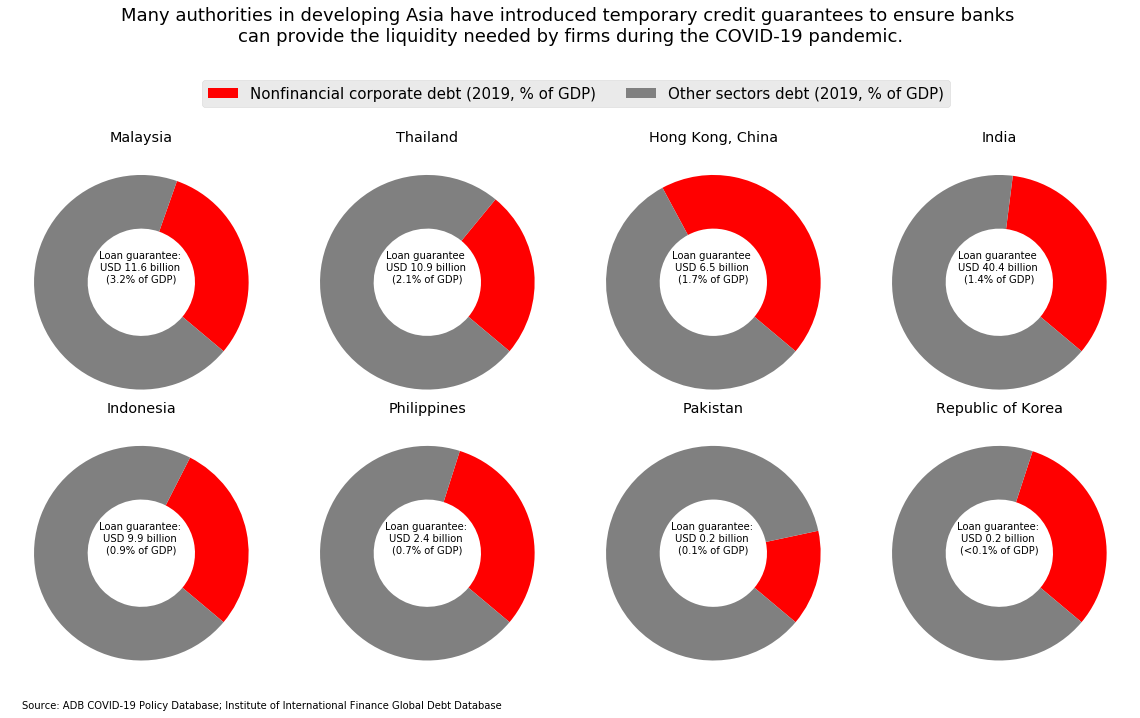

In [206]:
fig, axs = plt.subplots(figsize=(16, 8), nrows=2, ncols=4)

wedges, texts = axs[0, 0].pie(doughnut_data.loc['Malaysia', ['debt_gdp', 'other_gdp']], 
                                         wedgeprops=dict(width=0.5), startangle=-40,
                                         colors=['red', 'gray'])
axs[0, 0].text(0, 0, 'Loan guarantee: \nUSD 11.6 billion \n(3.2% of GDP)', 
               ha='center')
axs[0, 0].set(title='Malaysia')

wedges, texts = axs[0, 1].pie(doughnut_data.loc['Thailand', ['debt_gdp', 'other_gdp']], 
                                         wedgeprops=dict(width=0.5), startangle=-40,
                                         colors=['red', 'gray'])
axs[0, 1].text(0, 0, 'Loan guarantee \nUSD 10.9 billion \n(2.1% of GDP)',
               ha='center')
axs[0, 1].set(title='Thailand')

wedges, texts = axs[0, 2].pie(doughnut_data.loc['Hong Kong, China', ['debt_gdp', 'other_gdp']], 
                                         wedgeprops=dict(width=0.5), startangle=-40,
                                         colors=['red', 'gray'])
axs[0, 2].text(0, 0, 'Loan guarantee \nUSD 6.5 billion \n(1.7% of GDP)',
               ha='center')
axs[0, 2].set(title='Hong Kong, China')

wedges, texts = axs[0, 3].pie(doughnut_data.loc['India', ['debt_gdp', 'other_gdp']], 
                                         wedgeprops=dict(width=0.5), startangle=-40,
                                         colors=['red', 'gray'])
axs[0, 3].text(0, 0, 'Loan guarantee \nUSD 40.4 billion \n(1.4% of GDP)',
               ha='center')
axs[0, 3].set(title='India')

wedges, texts = axs[1, 0].pie(doughnut_data.loc['Indonesia', ['debt_gdp', 'other_gdp']], 
                                         wedgeprops=dict(width=0.5), startangle=-40,
                                         colors=['red', 'gray'])
axs[1, 0].text(0, 0, 'Loan guarantee: \nUSD 9.9 billion \n(0.9% of GDP)',
               ha='center')
axs[1, 0].set(title='Indonesia')

wedges, texts = axs[1, 1].pie(doughnut_data.loc['Philippines', ['debt_gdp', 'other_gdp']], 
                                         wedgeprops=dict(width=0.5), startangle=-40,
                                         colors=['red', 'gray'])
axs[1, 1].text(0, 0, 'Loan guarantee: \nUSD 2.4 billion \n(0.7% of GDP)',
               ha='center')
axs[1, 1].set(title='Philippines')

wedges, texts = axs[1, 2].pie(doughnut_data.loc['Pakistan', ['debt_gdp', 'other_gdp']], 
                                         wedgeprops=dict(width=0.5), startangle=-40,
                                         colors=['red', 'gray'])
axs[1, 2].text(0, 0, 'Loan guarantee: \nUSD 0.2 billion \n(0.1% of GDP)',
               ha='center')
axs[1, 2].set(title='Pakistan')

wedges, texts = axs[1, 3].pie(doughnut_data.loc['Republic of Korea', ['debt_gdp', 'other_gdp']], 
                                         wedgeprops=dict(width=0.5), startangle=-40,
                                         colors=['red', 'gray'])
axs[1, 3].text(0, 0, 'Loan guarantee: \nUSD 0.2 billion \n(<0.1% of GDP)',
               ha='center')
axs[1, 3].set(title='Republic of Korea')

fig.suptitle('Nonfinancial corporate debt is an impo',
             y=1.2, fontsize=18)

# Many authorities in developing Asia have introduced temporary credit guarantees to ensure banks \ncan provide the liquidity needed by firms during the COVID-19 pandemic.'
fig.legend(['Nonfinancial corporate debt (2019, % of GDP)', 'Other sectors debt (2019, % of GDP)'], 
           loc='upper center', ncol=2, bbox_to_anchor=(0.5, 1.12), 
           frameon=True, fontsize=15)
fig.tight_layout()
fig.subplots_adjust(wspace=0.05, hspace=0.01)
plt.annotate('Source: ADB COVID-19 Policy Database; Institute of International Finance Global Debt Database', 
            xy=(-3.13, -0.05), xycoords='axes fraction', textcoords='offset points', va='top')
plt.show()

In [135]:
data2[['amount_usd', 'lg_gdp', 'debt_gdp']].assign(lg_billion = lambda x: x.amount_usd / 1e9).sort_values(by='lg_gdp', ascending=False)

,amount_usd,lg_gdp,debt_gdp,lg_billion
country,,,,
Malaysia,1.163928e+10,3.186198,67.9,11.639276
Thailand,1.090079e+10,2.059951,47.3,10.900787
"Hong Kong, China",6.490580e+09,1.740153,228.2,6.490580
India,4.036805e+10,1.375135,44.0,40.368052
Indonesia,9.871945e+09,0.887996,22.6,9.871945
Philippines,2.357397e+09,0.660680,30.9,2.357397
Pakistan,1.807962e+08,0.063613,13.6,0.180796
Republic of Korea,2.458842e+08,0.015089,102.6,0.245884


In [212]:
doughnut_data

,debt_gdp,other_gdp,amount_usd,lg_gdp
country,,,,
India,44.0,85.0,4.036805e+10,1.375135
Malaysia,67.9,153.1,1.163928e+10,3.186198
Thailand,47.3,140.7,1.090079e+10,2.059951
Indonesia,22.6,56.4,9.871945e+09,0.887996
"Hong Kong, China",228.2,290.8,6.490580e+09,1.740153
Philippines,30.9,68.1,2.357397e+09,0.660680
Republic of Korea,102.6,227.4,2.458842e+08,0.015089
Pakistan,13.6,80.4,1.807962e+08,0.063613


In [213]:
doughnut_data.drop(columns=['debt_gdp', 'other_gdp'], inplace=True)

C:\Anaconda\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [214]:
doughnut_data

,amount_usd,lg_gdp
country,,
India,4.036805e+10,1.375135
Malaysia,1.163928e+10,3.186198
Thailand,1.090079e+10,2.059951
Indonesia,9.871945e+09,0.887996
"Hong Kong, China",6.490580e+09,1.740153
Philippines,2.357397e+09,0.660680
Republic of Korea,2.458842e+08,0.015089
Pakistan,1.807962e+08,0.063613


In [215]:
doughnut_data.join(df2)

,amount_usd,lg_gdp,total_pkg_lcy,total_pkg_usd
country,,,,
India,4.036805e+10,1.375135,2.608667e+13,3.510227e+11
Malaysia,1.163928e+10,3.186198,3.110000e+11,7.239629e+10
Thailand,1.090079e+10,2.059951,2.700000e+12,8.409179e+10
Indonesia,9.871945e+09,0.887996,9.328678e+14,6.139480e+10
"Hong Kong, China",6.490580e+09,1.740153,1.479250e+12,1.904998e+11
Philippines,2.357397e+09,0.660680,1.022064e+12,2.007842e+10
Republic of Korea,2.458842e+08,0.015089,2.520916e+14,2.066179e+11
Pakistan,1.807962e+08,0.063613,2.081492e+12,1.254419e+10


In [216]:
doughnut_data_2 = doughnut_data.join(df2)

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:55: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.


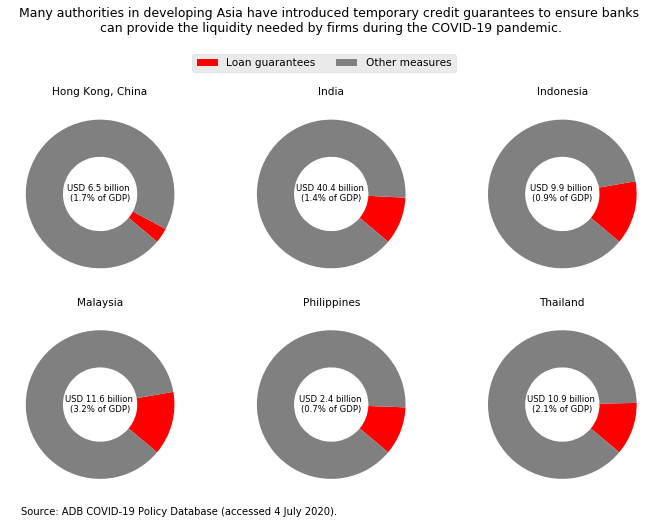

In [277]:
fig, axs = plt.subplots(figsize=(10, 6), nrows=2, ncols=3)

wedges, texts = axs[0, 0].pie(doughnut_data_2.loc['Hong Kong, China', ['amount_usd', 'total_pkg_usd']], 
                                         wedgeprops=dict(width=0.5), startangle=-40,
                                         colors=['red', 'gray'])
axs[0, 0].text(0, -0.1, 'USD 6.5 billion \n(1.7% of GDP)',
               ha='center', fontsize=8.5)
axs[0, 0].set_title('Hong Kong, China', fontsize=10.5)

wedges, texts = axs[0, 1].pie(doughnut_data_2.loc['India', ['amount_usd', 'total_pkg_usd']], 
                                         wedgeprops=dict(width=0.5), startangle=-40,
                                         colors=['red', 'gray'])
axs[0, 1].text(0, -0.1, 'USD 40.4 billion \n(1.4% of GDP)',
               ha='center', fontsize=8.5)
axs[0, 1].set_title('India', fontsize=10.5)

wedges, texts = axs[0, 2].pie(doughnut_data_2.loc['Indonesia', ['amount_usd', 'total_pkg_usd']], 
                                         wedgeprops=dict(width=0.5), startangle=-40,
                                         colors=['red', 'gray'])
axs[0, 2].text(0, -0.1, 'USD 9.9 billion \n(0.9% of GDP)',
               ha='center', fontsize=8.5)
axs[0, 2].set_title('Indonesia', fontsize=10.5)

wedges, texts = axs[1, 0].pie(doughnut_data_2.loc['Malaysia', ['amount_usd', 'total_pkg_usd']], 
                                         wedgeprops=dict(width=0.5), startangle=-40,
                                         colors=['red', 'gray'])
axs[1, 0].text(0, -0.1, 'USD 11.6 billion \n(3.2% of GDP)', 
               ha='center', fontsize=8.5)
axs[1, 0].set_title('Malaysia', fontsize=10.5)

wedges, texts = axs[1, 1].pie(doughnut_data_2.loc['Philippines', ['amount_usd', 'total_pkg_usd']], 
                                         wedgeprops=dict(width=0.5), startangle=-40,
                                         colors=['red', 'gray'])
axs[1, 1].text(0, -0.1, 'USD 2.4 billion \n(0.7% of GDP)',
               ha='center', fontsize=8.5)
axs[1, 1].set_title('Philippines', fontsize=10.5)

wedges, texts = axs[1, 2].pie(doughnut_data_2.loc['Thailand', ['amount_usd', 'total_pkg_usd']], 
                                         wedgeprops=dict(width=0.5), startangle=-40,
                                         colors=['red', 'gray'])
axs[1, 2].text(0, -0.1, 'USD 10.9 billion \n(2.1% of GDP)',
               ha='center', fontsize=8.5)
axs[1, 2].set_title('Thailand', fontsize=10.5)


fig.suptitle('Many authorities in developing Asia have introduced temporary credit guarantees to ensure banks \ncan provide the liquidity needed by firms during the COVID-19 pandemic.',
             y=1.16, fontsize=12.5)

fig.legend(['Loan guarantees', 'Other measures'], 
           loc='upper center', ncol=2, bbox_to_anchor=(0.45, 1.1), 
           frameon=True, fontsize=10.5)
fig.tight_layout()
# fig.subplots_adjust(wspace=0, hspace=0)
plt.annotate('Source: ADB COVID-19 Policy Database (accessed 4 July 2020).', 
            xy=(-2.4, -0.05), xycoords='axes fraction', textcoords='offset points', va='top')
plt.show()

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:55: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.


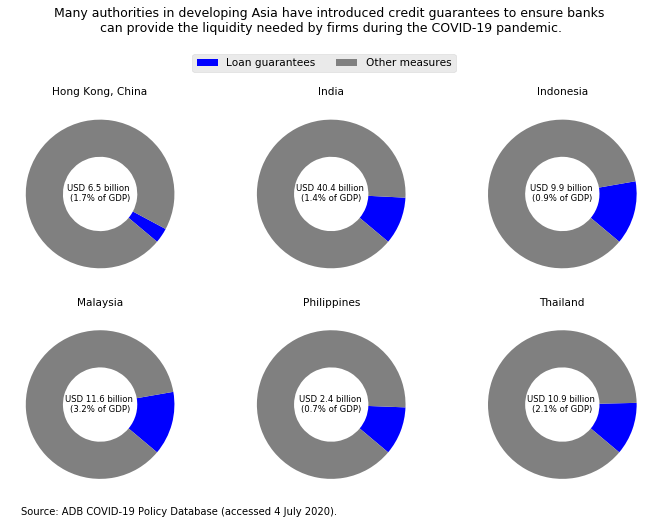

In [285]:
fig, axs = plt.subplots(figsize=(10, 6), nrows=2, ncols=3)

wedges, texts = axs[0, 0].pie(doughnut_data_2.loc['Hong Kong, China', ['amount_usd', 'total_pkg_usd']], 
                                         wedgeprops=dict(width=0.5), startangle=-40,
                                         colors=['blue', 'gray'])
axs[0, 0].text(0, -0.1, 'USD 6.5 billion \n(1.7% of GDP)',
               ha='center', fontsize=8.5)
axs[0, 0].set_title('Hong Kong, China', fontsize=10.5)

wedges, texts = axs[0, 1].pie(doughnut_data_2.loc['India', ['amount_usd', 'total_pkg_usd']], 
                                         wedgeprops=dict(width=0.5), startangle=-40,
                                         colors=['blue', 'gray'])
axs[0, 1].text(0, -0.1, 'USD 40.4 billion \n(1.4% of GDP)',
               ha='center', fontsize=8.5)
axs[0, 1].set_title('India', fontsize=10.5)

wedges, texts = axs[0, 2].pie(doughnut_data_2.loc['Indonesia', ['amount_usd', 'total_pkg_usd']], 
                                         wedgeprops=dict(width=0.5), startangle=-40,
                                         colors=['blue', 'gray'])
axs[0, 2].text(0, -0.1, 'USD 9.9 billion \n(0.9% of GDP)',
               ha='center', fontsize=8.5)
axs[0, 2].set_title('Indonesia', fontsize=10.5)

wedges, texts = axs[1, 0].pie(doughnut_data_2.loc['Malaysia', ['amount_usd', 'total_pkg_usd']], 
                                         wedgeprops=dict(width=0.5), startangle=-40,
                                         colors=['blue', 'gray'])
axs[1, 0].text(0, -0.1, 'USD 11.6 billion \n(3.2% of GDP)', 
               ha='center', fontsize=8.5)
axs[1, 0].set_title('Malaysia', fontsize=10.5)

wedges, texts = axs[1, 1].pie(doughnut_data_2.loc['Philippines', ['amount_usd', 'total_pkg_usd']], 
                                         wedgeprops=dict(width=0.5), startangle=-40,
                                         colors=['blue', 'gray'])
axs[1, 1].text(0, -0.1, 'USD 2.4 billion \n(0.7% of GDP)',
               ha='center', fontsize=8.5)
axs[1, 1].set_title('Philippines', fontsize=10.5)

wedges, texts = axs[1, 2].pie(doughnut_data_2.loc['Thailand', ['amount_usd', 'total_pkg_usd']], 
                                         wedgeprops=dict(width=0.5), startangle=-40,
                                         colors=['blue', 'gray'])
axs[1, 2].text(0, -0.1, 'USD 10.9 billion \n(2.1% of GDP)',
               ha='center', fontsize=8.5)
axs[1, 2].set_title('Thailand', fontsize=10.5)


fig.suptitle('Many authorities in developing Asia have introduced credit guarantees to ensure banks \ncan provide the liquidity needed by firms during the COVID-19 pandemic.',
             y=1.16, fontsize=12.5)

fig.legend(['Loan guarantees', 'Other measures'], 
           loc='upper center', ncol=2, bbox_to_anchor=(0.45, 1.1), 
           frameon=True, fontsize=10.5)
fig.tight_layout()
# fig.subplots_adjust(wspace=0, hspace=0)
plt.annotate('Source: ADB COVID-19 Policy Database (accessed 4 July 2020).', 
            xy=(-2.4, -0.05), xycoords='axes fraction', textcoords='offset points', va='top')
plt.show()

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:55: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.


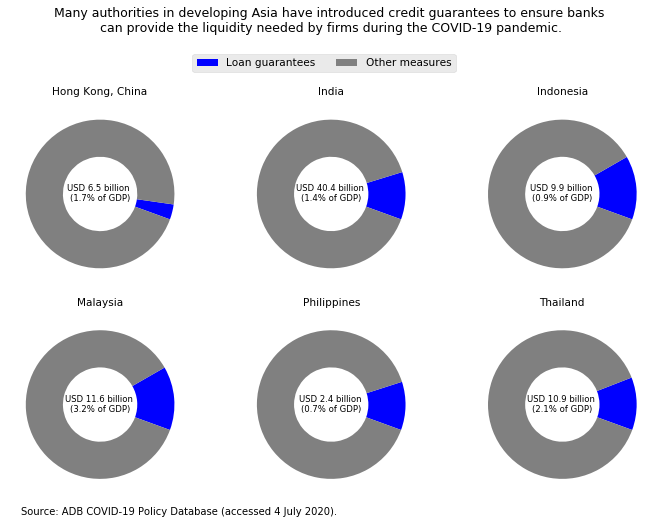

In [286]:
fig, axs = plt.subplots(figsize=(10, 6), nrows=2, ncols=3)

wedges, texts = axs[0, 0].pie(doughnut_data_2.loc['Hong Kong, China', ['amount_usd', 'total_pkg_usd']], 
                                         wedgeprops=dict(width=0.5), startangle=-20,
                                         colors=['blue', 'gray'])
axs[0, 0].text(0, -0.1, 'USD 6.5 billion \n(1.7% of GDP)',
               ha='center', fontsize=8.5)
axs[0, 0].set_title('Hong Kong, China', fontsize=10.5)

wedges, texts = axs[0, 1].pie(doughnut_data_2.loc['India', ['amount_usd', 'total_pkg_usd']], 
                                         wedgeprops=dict(width=0.5), startangle=-20,
                                         colors=['blue', 'gray'])
axs[0, 1].text(0, -0.1, 'USD 40.4 billion \n(1.4% of GDP)',
               ha='center', fontsize=8.5)
axs[0, 1].set_title('India', fontsize=10.5)

wedges, texts = axs[0, 2].pie(doughnut_data_2.loc['Indonesia', ['amount_usd', 'total_pkg_usd']], 
                                         wedgeprops=dict(width=0.5), startangle=-20,
                                         colors=['blue', 'gray'])
axs[0, 2].text(0, -0.1, 'USD 9.9 billion \n(0.9% of GDP)',
               ha='center', fontsize=8.5)
axs[0, 2].set_title('Indonesia', fontsize=10.5)

wedges, texts = axs[1, 0].pie(doughnut_data_2.loc['Malaysia', ['amount_usd', 'total_pkg_usd']], 
                                         wedgeprops=dict(width=0.5), startangle=-20,
                                         colors=['blue', 'gray'])
axs[1, 0].text(0, -0.1, 'USD 11.6 billion \n(3.2% of GDP)', 
               ha='center', fontsize=8.5)
axs[1, 0].set_title('Malaysia', fontsize=10.5)

wedges, texts = axs[1, 1].pie(doughnut_data_2.loc['Philippines', ['amount_usd', 'total_pkg_usd']], 
                                         wedgeprops=dict(width=0.5), startangle=-20,
                                         colors=['blue', 'gray'])
axs[1, 1].text(0, -0.1, 'USD 2.4 billion \n(0.7% of GDP)',
               ha='center', fontsize=8.5)
axs[1, 1].set_title('Philippines', fontsize=10.5)

wedges, texts = axs[1, 2].pie(doughnut_data_2.loc['Thailand', ['amount_usd', 'total_pkg_usd']], 
                                         wedgeprops=dict(width=0.5), startangle=-20,
                                         colors=['blue', 'gray'])
axs[1, 2].text(0, -0.1, 'USD 10.9 billion \n(2.1% of GDP)',
               ha='center', fontsize=8.5)
axs[1, 2].set_title('Thailand', fontsize=10.5)


fig.suptitle('Many authorities in developing Asia have introduced credit guarantees to ensure banks \ncan provide the liquidity needed by firms during the COVID-19 pandemic.',
             y=1.16, fontsize=12.5)

fig.legend(['Loan guarantees', 'Other measures'], 
           loc='upper center', ncol=2, bbox_to_anchor=(0.45, 1.1), 
           frameon=True, fontsize=10.5)
fig.tight_layout()
# fig.subplots_adjust(wspace=0, hspace=0)
plt.annotate('Source: ADB COVID-19 Policy Database (accessed 4 July 2020).', 
            xy=(-2.4, -0.05), xycoords='axes fraction', textcoords='offset points', va='top')
plt.show()

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:56: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.


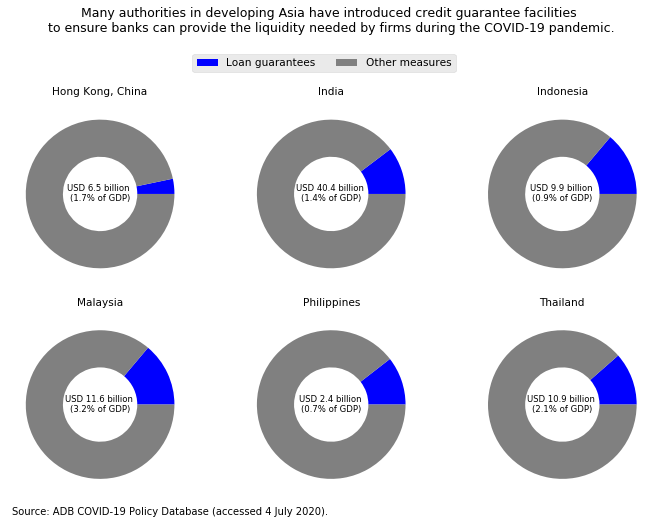

In [289]:
fig, axs = plt.subplots(figsize=(10, 6), nrows=2, ncols=3)

wedges, texts = axs[0, 0].pie(doughnut_data_2.loc['Hong Kong, China', ['amount_usd', 'total_pkg_usd']], 
                                         wedgeprops=dict(width=0.5), startangle=0,
                                         colors=['blue', 'gray'])
axs[0, 0].text(0, -0.1, 'USD 6.5 billion \n(1.7% of GDP)',
               ha='center', fontsize=8.5)
axs[0, 0].set_title('Hong Kong, China', fontsize=10.5)

wedges, texts = axs[0, 1].pie(doughnut_data_2.loc['India', ['amount_usd', 'total_pkg_usd']], 
                                         wedgeprops=dict(width=0.5), startangle=0,
                                         colors=['blue', 'gray'])
axs[0, 1].text(0, -0.1, 'USD 40.4 billion \n(1.4% of GDP)',
               ha='center', fontsize=8.5)
axs[0, 1].set_title('India', fontsize=10.5)

wedges, texts = axs[0, 2].pie(doughnut_data_2.loc['Indonesia', ['amount_usd', 'total_pkg_usd']], 
                                         wedgeprops=dict(width=0.5), startangle=0,
                                         colors=['blue', 'gray'])
axs[0, 2].text(0, -0.1, 'USD 9.9 billion \n(0.9% of GDP)',
               ha='center', fontsize=8.5)
axs[0, 2].set_title('Indonesia', fontsize=10.5)

wedges, texts = axs[1, 0].pie(doughnut_data_2.loc['Malaysia', ['amount_usd', 'total_pkg_usd']], 
                                         wedgeprops=dict(width=0.5), startangle=0,
                                         colors=['blue', 'gray'])
axs[1, 0].text(0, -0.1, 'USD 11.6 billion \n(3.2% of GDP)', 
               ha='center', fontsize=8.5)
axs[1, 0].set_title('Malaysia', fontsize=10.5)

wedges, texts = axs[1, 1].pie(doughnut_data_2.loc['Philippines', ['amount_usd', 'total_pkg_usd']], 
                                         wedgeprops=dict(width=0.5), startangle=0,
                                         colors=['blue', 'gray'])
axs[1, 1].text(0, -0.1, 'USD 2.4 billion \n(0.7% of GDP)',
               ha='center', fontsize=8.5)
axs[1, 1].set_title('Philippines', fontsize=10.5)

wedges, texts = axs[1, 2].pie(doughnut_data_2.loc['Thailand', ['amount_usd', 'total_pkg_usd']], 
                                         wedgeprops=dict(width=0.5), startangle=0,
                                         colors=['blue', 'gray'])
axs[1, 2].text(0, -0.1, 'USD 10.9 billion \n(2.1% of GDP)',
               ha='center', fontsize=8.5)
axs[1, 2].set_title('Thailand', fontsize=10.5)


fig.suptitle('Many authorities in developing Asia have introduced credit guarantee facilities \
\nto ensure banks can provide the liquidity needed by firms during the COVID-19 pandemic.',
             y=1.16, fontsize=12.5)

fig.legend(['Loan guarantees', 'Other measures'], 
           loc='upper center', ncol=2, bbox_to_anchor=(0.45, 1.1), 
           frameon=True, fontsize=10.5)
fig.tight_layout()
# fig.subplots_adjust(wspace=0, hspace=0)
plt.annotate('Source: ADB COVID-19 Policy Database (accessed 4 July 2020).', 
            xy=(-2.45, -0.05), xycoords='axes fraction', textcoords='offset points', va='top')
plt.show()